# Proyecto 011

## JAVIER CRUZ

#### Descripción de proyecto

una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios llegan a la etapa de compra. ¿Cuántos usuarios realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

Luego, observa los resultados de un test A/A/B (sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios participan en experimentos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Leer el archivo CSV (usando tabulaciones como separador)
df = pd.read_csv('logs_exp_us.csv', sep='\t')

print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Forma del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print("\nPrimeras 5 filas:")
print(df.head())
print("\nTipos de datos:")
print(df.dtypes)
print("\nInformación del dataset:")
print(df.info())

=== INFORMACIÓN GENERAL DEL DATASET ===
Forma del dataset: (244126, 4)
Columnas: ['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId']

Primeras 5 filas:
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

Tipos de datos:
EventName         object
DeviceIDHash       int64
EventTimestamp     int64
ExpId              int64
dtype: object

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHa

## PASO 2: Preparar los datos para el análisis

In [3]:
# 1. Cambiar nombres de columnas para mayor comodidad
df.columns = ['event_name', 'user_id', 'timestamp', 'exp_id']

print("=== PASO 2: PREPARACIÓN DE DATOS ===")
print("Nuevos nombres de columnas:", list(df.columns))

# 2. Verificar valores ausentes
print("\nValores ausentes por columna:")
print(df.isnull().sum())

# 3. Verificar tipos de datos
print("\nTipos de datos actuales:")
print(df.dtypes)

# 4. Agregar columna de fecha y hora
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['datetime'].dt.date

print("\nPrimeras 5 filas con nuevas columnas:")
print(df[['event_name', 'user_id', 'timestamp', 'datetime', 'date', 'exp_id']].head())

print("\nRango de fechas:")
print(f"Fecha mínima: {df['datetime'].min()}")
print(f"Fecha máxima: {df['datetime'].max()}")
print(f"Período total: {(df['datetime'].max() - df['datetime'].min()).days} días")

=== PASO 2: PREPARACIÓN DE DATOS ===
Nuevos nombres de columnas: ['event_name', 'user_id', 'timestamp', 'exp_id']

Valores ausentes por columna:
event_name    0
user_id       0
timestamp     0
exp_id        0
dtype: int64

Tipos de datos actuales:
event_name    object
user_id        int64
timestamp      int64
exp_id         int64
dtype: object

Primeras 5 filas con nuevas columnas:
                event_name              user_id   timestamp  \
0         MainScreenAppear  4575588528974610257  1564029816   
1         MainScreenAppear  7416695313311560658  1564053102   
2  PaymentScreenSuccessful  3518123091307005509  1564054127   
3         CartScreenAppear  3518123091307005509  1564054127   
4  PaymentScreenSuccessful  6217807653094995999  1564055322   

             datetime        date  exp_id  
0 2019-07-25 04:43:36  2019-07-25     246  
1 2019-07-25 11:11:42  2019-07-25     246  
2 2019-07-25 11:28:47  2019-07-25     248  
3 2019-07-25 11:28:47  2019-07-25     248  
4 2019-07-25 11:

## PASO 3: Estudiar y comprobar los datos

In [4]:
# 1. ¿Cuántos eventos hay en los registros?
total_events = len(df)
print(f"1. Total de eventos: {total_events:,}")

# 2. ¿Cuántos usuarios hay en los registros?
unique_users = df['user_id'].nunique()
print(f"2. Total de usuarios únicos: {unique_users:,}")

# 3. ¿Cuál es el promedio de eventos por usuario?
avg_events_per_user = total_events / unique_users
print(f"3. Promedio de eventos por usuario: {avg_events_per_user:.2f}")

# 4. Período de tiempo y distribución
print(f"\n4. Análisis temporal:")
print(f"   - Fecha mínima: {df['datetime'].min()}")
print(f"   - Fecha máxima: {df['datetime'].max()}")
print(f"   - Período total: {(df['datetime'].max() - df['datetime'].min()).days} días")

1. Total de eventos: 244,126
2. Total de usuarios únicos: 7,551
3. Promedio de eventos por usuario: 32.33

4. Análisis temporal:
   - Fecha mínima: 2019-07-25 04:43:36
   - Fecha máxima: 2019-08-07 21:15:17
   - Período total: 13 días


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2019-07-25'),
  Text(1, 0, '2019-07-26'),
  Text(2, 0, '2019-07-27'),
  Text(3, 0, '2019-07-28'),
  Text(4, 0, '2019-07-29'),
  Text(5, 0, '2019-07-30'),
  Text(6, 0, '2019-07-31'),
  Text(7, 0, '2019-08-01'),
  Text(8, 0, '2019-08-02'),
  Text(9, 0, '2019-08-03'),
  Text(10, 0, '2019-08-04'),
  Text(11, 0, '2019-08-05'),
  Text(12, 0, '2019-08-06'),
  Text(13, 0, '2019-08-07')])

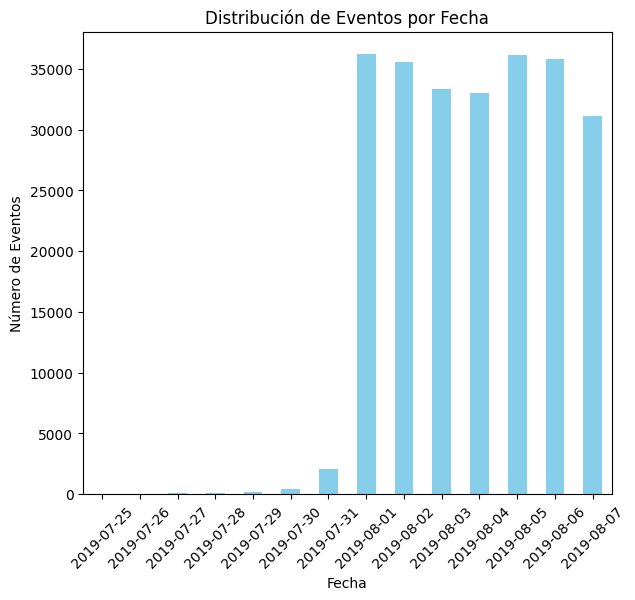

In [5]:
# Crear histograma por fecha
plt.figure(figsize=(15, 6))

# Histograma por fecha
plt.subplot(1, 2, 1)
daily_events = df.groupby('date').size()
daily_events.plot(kind='bar', color='skyblue')
plt.title('Distribución de Eventos por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)


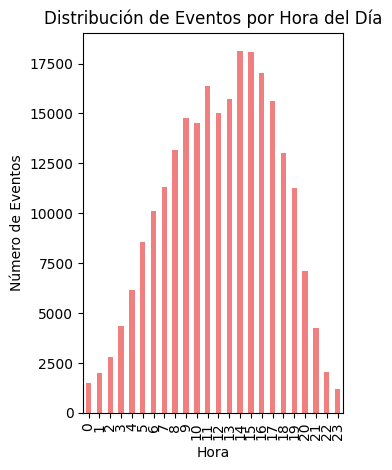

In [6]:
# Histograma por hora del día
plt.subplot(1, 2, 2)
df['hour'] = df['datetime'].dt.hour
hourly_events = df.groupby('hour').size()
hourly_events.plot(kind='bar', color='lightcoral')
plt.title('Distribución de Eventos por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')

plt.tight_layout()
plt.show()

## PASO 4. Estudiar el embudo de eventos

In [7]:
# Análisis de completitud de datos
print("=== ANÁLISIS DE COMPLETITUD DE DATOS ===")

# Analizar cuándo los datos comienzan a estar completos
daily_events = df.groupby('date').size()
print("Eventos por día (detallado):")
for date, count in daily_events.items():
    print(f"{date}: {count:,} eventos")

# Los primeros días tienen muy pocos eventos, vamos a encontrar cuándo se estabilizan
print(f"\nAnálisis:")
print(f"- Los primeros 6 días (25-30 julio) tienen muy pocos eventos: {daily_events.iloc[:6].sum():,}")
print(f"- A partir del 31 de julio los datos se estabilizan con >30,000 eventos diarios")

# Definir fecha de corte para datos completos
cutoff_date = pd.to_datetime('2019-07-31')
print(f"\nFecha de corte para datos completos: {cutoff_date.date()}")

# Filtrar datos completos
df_complete = df[df['datetime'] >= cutoff_date].copy()


=== ANÁLISIS DE COMPLETITUD DE DATOS ===
Eventos por día (detallado):
2019-07-25: 9 eventos
2019-07-26: 31 eventos
2019-07-27: 55 eventos
2019-07-28: 105 eventos
2019-07-29: 184 eventos
2019-07-30: 413 eventos
2019-07-31: 2,031 eventos
2019-08-01: 36,229 eventos
2019-08-02: 35,606 eventos
2019-08-03: 33,351 eventos
2019-08-04: 33,033 eventos
2019-08-05: 36,113 eventos
2019-08-06: 35,822 eventos
2019-08-07: 31,144 eventos

Análisis:
- Los primeros 6 días (25-30 julio) tienen muy pocos eventos: 797
- A partir del 31 de julio los datos se estabilizan con >30,000 eventos diarios

Fecha de corte para datos completos: 2019-07-31


In [8]:
print(f"\nComparación:")
print(f"- Datos originales: {len(df):,} eventos, {df['user_id'].nunique():,} usuarios")
print(f"- Datos completos: {len(df_complete):,} eventos, {df_complete['user_id'].nunique():,} usuarios")
print(f"- Eventos perdidos: {len(df) - len(df_complete):,} ({((len(df) - len(df_complete))/len(df)*100):.1f}%)")
print(f"- Usuarios perdidos: {df['user_id'].nunique() - df_complete['user_id'].nunique():,} ({((df['user_id'].nunique() - df_complete['user_id'].nunique())/df['user_id'].nunique()*100):.1f}%)")

# Verificar grupos experimentales en datos completos
print(f"\nUsuarios por grupo experimental (datos completos):")
exp_groups = df_complete.groupby('exp_id')['user_id'].nunique()
for exp_id, user_count in exp_groups.items():
    print(f"- Grupo {exp_id}: {user_count:,} usuarios")

print(f"\nPeríodo real de datos completos: {(df_complete['datetime'].max() - df_complete['datetime'].min()).days} días")


Comparación:
- Datos originales: 244,126 eventos, 7,551 usuarios
- Datos completos: 243,329 eventos, 7,542 usuarios
- Eventos perdidos: 797 (0.3%)
- Usuarios perdidos: 9 (0.1%)

Usuarios por grupo experimental (datos completos):
- Grupo 246: 2,485 usuarios
- Grupo 247: 2,517 usuarios
- Grupo 248: 2,540 usuarios

Período real de datos completos: 7 días


In [9]:
# Usar datos completos para el análisis
df_analysis = df_complete.copy()

# 1. Eventos y su frecuencia
print("1. Eventos ordenados por frecuencia:")
event_frequency = df_analysis['event_name'].value_counts()
print(event_frequency)

# 2. Usuarios únicos que realizaron cada acción
print("\n2. Usuarios únicos por evento:")
users_per_event = df_analysis.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
print(users_per_event)

# 3. Proporción de usuarios que realizaron cada acción
print("\n3. Proporción de usuarios que realizaron cada acción:")
total_users = df_analysis['user_id'].nunique()
user_proportions = (users_per_event / total_users * 100).round(2)
for event, proportion in user_proportions.items():
    print(f"- {event}: {users_per_event[event]:,} usuarios ({proportion}%)")

1. Eventos ordenados por frecuencia:
MainScreenAppear           118681
OffersScreenAppear          46724
CartScreenAppear            42623
PaymentScreenSuccessful     34253
Tutorial                     1048
Name: event_name, dtype: int64

2. Usuarios únicos por evento:
event_name
MainScreenAppear           7429
OffersScreenAppear         4606
CartScreenAppear           3742
PaymentScreenSuccessful    3542
Tutorial                    845
Name: user_id, dtype: int64

3. Proporción de usuarios que realizaron cada acción:
- MainScreenAppear: 7,429 usuarios (98.5%)
- OffersScreenAppear: 4,606 usuarios (61.07%)
- CartScreenAppear: 3,742 usuarios (49.62%)
- PaymentScreenSuccessful: 3,542 usuarios (46.96%)
- Tutorial: 845 usuarios (11.2%)


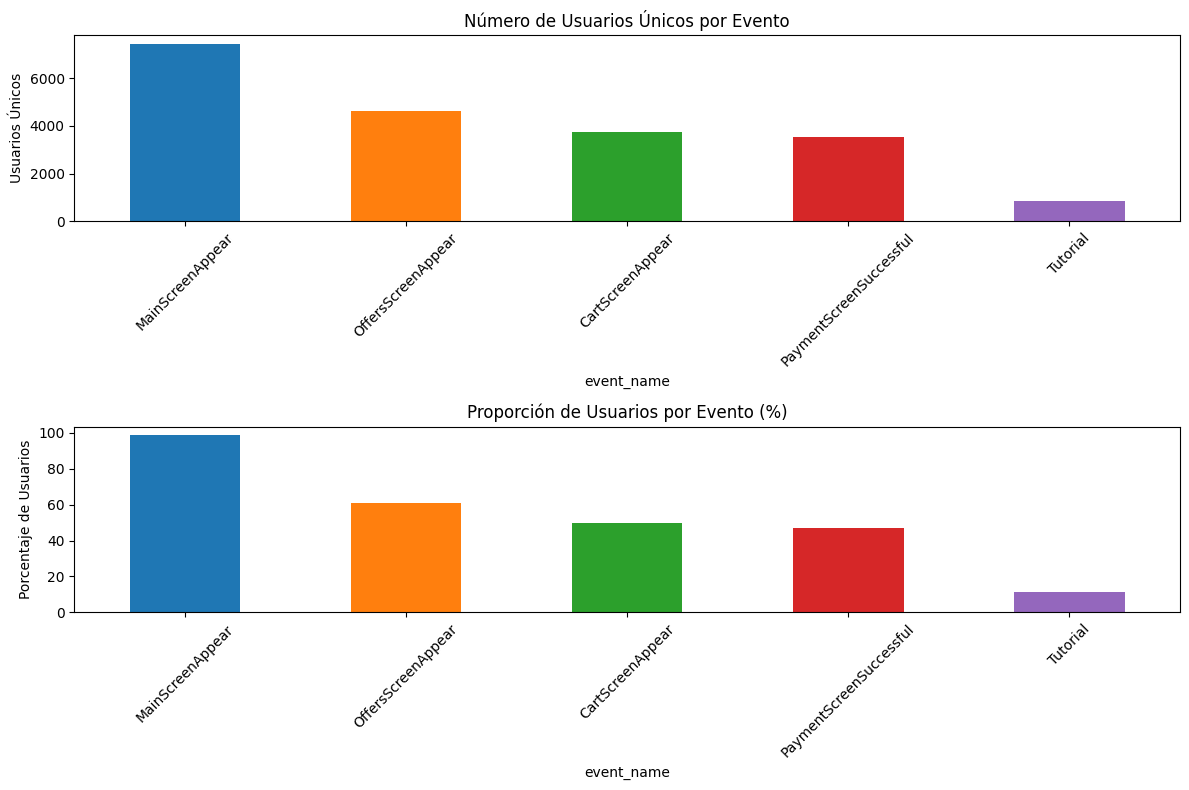

In [10]:
# Visualizar el embudo
plt.figure(figsize=(12, 8))

# GRAFICAR
plt.subplot(2, 1, 1)
users_per_event.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Número de Usuarios Únicos por Evento')
plt.ylabel('Usuarios Únicos')
plt.xticks(rotation=45)

# GRAFICAR
plt.subplot(2, 1, 2)
user_proportions.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Proporción de Usuarios por Evento (%)')
plt.ylabel('Porcentaje de Usuarios')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [11]:
# Análisis del embudo de conversión
print("=== ANÁLISIS DEL EMBUDO DE CONVERSIÓN ===")

# Definir la secuencia lógica del embudo (excluyendo Tutorial que no es parte del flujo principal)
funnel_sequence = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

print("Secuencia del embudo identificada:")
for i, event in enumerate(funnel_sequence, 1):
    print(f"{i}. {event}")

print(f"\nNota: 'Tutorial' no forma parte del embudo principal (solo {user_proportions['Tutorial']}% de usuarios)")

# Calcular tasas de conversión entre etapas
print("\n=== TASAS DE CONVERSIÓN ===")

conversion_rates = {}
for i in range(len(funnel_sequence) - 1):
    current_event = funnel_sequence[i]
    next_event = funnel_sequence[i + 1]
    
    current_users = users_per_event[current_event]
    next_users = users_per_event[next_event]
    
    conversion_rate = (next_users / current_users) * 100
    conversion_rates[f"{current_event} → {next_event}"] = conversion_rate
    
    print(f"{current_event} → {next_event}:")
    print(f"  {current_users:,} → {next_users:,} usuarios ({conversion_rate:.1f}%)")

=== ANÁLISIS DEL EMBUDO DE CONVERSIÓN ===
Secuencia del embudo identificada:
1. MainScreenAppear
2. OffersScreenAppear
3. CartScreenAppear
4. PaymentScreenSuccessful

Nota: 'Tutorial' no forma parte del embudo principal (solo 11.2% de usuarios)

=== TASAS DE CONVERSIÓN ===
MainScreenAppear → OffersScreenAppear:
  7,429 → 4,606 usuarios (62.0%)
OffersScreenAppear → CartScreenAppear:
  4,606 → 3,742 usuarios (81.2%)
CartScreenAppear → PaymentScreenSuccessful:
  3,742 → 3,542 usuarios (94.7%)


In [12]:
# Encontrar dónde se pierden más usuarios
print("\n=== ANÁLISIS DE PÉRDIDAS ===")
losses = {}
for i in range(len(funnel_sequence) - 1):
    current_event = funnel_sequence[i]
    next_event = funnel_sequence[i + 1]
    
    current_users = users_per_event[current_event]
    next_users = users_per_event[next_event]
    
    lost_users = current_users - next_users
    loss_rate = (lost_users / current_users) * 100
    losses[f"{current_event} → {next_event}"] = loss_rate
    
    print(f"Entre {current_event} y {next_event}:")
    print(f"  Se pierden {lost_users:,} usuarios ({loss_rate:.1f}%)")

# Conversión total del embudo
total_conversion = (users_per_event['PaymentScreenSuccessful'] / users_per_event['MainScreenAppear']) * 100
print(f"\n=== CONVERSIÓN TOTAL DEL EMBUDO ===")
print(f"De {users_per_event['MainScreenAppear']:,} usuarios que ven la pantalla principal,")
print(f"{users_per_event['PaymentScreenSuccessful']:,} completan el pago ({total_conversion:.1f}%)")

# Identificar la etapa con mayor pérdida
max_loss_stage = max(losses, key=losses.get)
max_loss_rate = losses[max_loss_stage]
print(f"\n🔴 MAYOR PÉRDIDA: {max_loss_stage} ({max_loss_rate:.1f}%)")


=== ANÁLISIS DE PÉRDIDAS ===
Entre MainScreenAppear y OffersScreenAppear:
  Se pierden 2,823 usuarios (38.0%)
Entre OffersScreenAppear y CartScreenAppear:
  Se pierden 864 usuarios (18.8%)
Entre CartScreenAppear y PaymentScreenSuccessful:
  Se pierden 200 usuarios (5.3%)

=== CONVERSIÓN TOTAL DEL EMBUDO ===
De 7,429 usuarios que ven la pantalla principal,
3,542 completan el pago (47.7%)

🔴 MAYOR PÉRDIDA: MainScreenAppear → OffersScreenAppear (38.0%)


## PASO 5. Estudiar los resultados del experimento

1. ¿Cuántos usuarios hay en cada grupo?

Cuenta cuántos usuarios únicos hay en cada grupo experimental (exp_id):
246 y 247 son los grupos de control (A/A).
248 es el grupo de prueba (B, con la fuente nueva).

2. Comparar los grupos de control (A/A)

El objetivo es asegurarse de que los grupos de control sean estadísticamente similares.
Para cada evento importante (por ejemplo, el más popular y los del embudo), calcula:
El número de usuarios que realizaron ese evento en cada grupo.
La proporción de usuarios que realizaron ese evento en cada grupo.
Realiza una prueba estadística (por ejemplo, test de proporciones o chi-cuadrado) para ver si hay diferencias significativas entre los grupos 246 y 247.
Si los grupos A/A son similares, puedes confiar en la validez del experimento.

3. Comparar el grupo de prueba (B) con los controles

Repite el análisis anterior, pero ahora compara el grupo 248 (fuente nueva) con cada grupo de control y con ambos controles combinados.
Para cada evento, calcula la proporción de usuarios que lo realizaron y realiza pruebas estadísticas para ver si hay diferencias significativas.

In [13]:
from statsmodels.stats.proportion import proportions_ztest

# Eventos clave del embudo
eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
grupos = [246, 247, 248]

# Calcular proporciones por grupo y evento
proporciones = {}
for grupo in grupos:
    df_g = df_complete[df_complete['exp_id'] == grupo]
    total_usuarios = df_g['user_id'].nunique()
    proporciones[grupo] = {}
    for evento in eventos:
        usuarios_evento = df_g[df_g['event_name'] == evento]['user_id'].nunique()
        proporciones[grupo][evento] = usuarios_evento / total_usuarios

# Calcular proporciones para controles combinados
df_control = df_complete[df_complete['exp_id'].isin([246, 247])]
total_usuarios_control = df_control['user_id'].nunique()
proporciones['control_combinado'] = {}
for evento in eventos:
    usuarios_evento = df_control[df_control['event_name'] == evento]['user_id'].nunique()
    proporciones['control_combinado'][evento] = usuarios_evento / total_usuarios_control

# Mostrar resultados
import pandas as pd
proporciones_df = pd.DataFrame(proporciones).T
print(proporciones_df)

                   MainScreenAppear  OffersScreenAppear  CartScreenAppear  \
246                        0.986720            0.621328          0.509859   
247                        0.984903            0.606277          0.492253   
248                        0.983465            0.604724          0.486614   
control_combinado          0.985806            0.613754          0.501000   

                   PaymentScreenSuccessful  
246                               0.482897  
247                               0.460469  
248                               0.465748  
control_combinado                 0.471611  


In [14]:
# Función para comparar dos grupos
def comparar_proporciones(grupo1, grupo2, evento):
    df1 = df_complete[df_complete['exp_id'] == grupo1]
    df2 = df_complete[df_complete['exp_id'] == grupo2]
    total1 = df1['user_id'].nunique()
    total2 = df2['user_id'].nunique()
    usuarios1 = df1[df1['event_name'] == evento]['user_id'].nunique()
    usuarios2 = df2[df2['event_name'] == evento]['user_id'].nunique()
    stat, pval = proportions_ztest([usuarios1, usuarios2], [total1, total2])
    return pval

# Comparar grupo 248 con 246, 247 y controles combinados
for evento in eventos:
    pval_246 = comparar_proporciones(248, 246, evento)
    pval_247 = comparar_proporciones(248, 247, evento)
    # Para controles combinados
    total_control = total_usuarios_control
    usuarios_control = df_control[df_control['event_name'] == evento]['user_id'].nunique()
    df_248 = df_complete[df_complete['exp_id'] == 248]
    total_248 = df_248['user_id'].nunique()
    usuarios_248 = df_248[df_248['event_name'] == evento]['user_id'].nunique()
    stat, pval_comb = proportions_ztest([usuarios_248, usuarios_control], [total_248, total_control])
    print(f"Evento: {evento}")
    print(f"  p-valor 248 vs 246: {pval_246:.4f}")
    print(f"  p-valor 248 vs 247: {pval_247:.4f}")
    print(f"  p-valor 248 vs controles combinados: {pval_comb:.4f}")

Evento: MainScreenAppear
  p-valor 248 vs 246: 0.3413
  p-valor 248 vs 247: 0.6820
  p-valor 248 vs controles combinados: 0.4290
Evento: OffersScreenAppear
  p-valor 248 vs 246: 0.2270
  p-valor 248 vs 247: 0.9101
  p-valor 248 vs controles combinados: 0.4472
Evento: CartScreenAppear
  p-valor 248 vs 246: 0.0994
  p-valor 248 vs 247: 0.6884
  p-valor 248 vs controles combinados: 0.2376
Evento: PaymentScreenSuccessful
  p-valor 248 vs 246: 0.2235
  p-valor 248 vs 247: 0.7066
  p-valor 248 vs controles combinados: 0.6297


Si el p-valor es menor a 0.05 (o el nivel de significancia que elijas), la diferencia es estadísticamente significativa.
Así puedes ver si la fuente nueva (grupo 248) afecta el comportamiento de los usuarios en cada etapa del embudo, comparado con los controles.

4. Conclusiones del experimento

¿Qué grupo tiene mejores resultados en el embudo de conversión?
¿La fuente nueva (grupo 248) mejora, empeora o no afecta el comportamiento de los usuarios?
¿Las diferencias encontradas son estadísticamente significativas?

In [15]:
# Eventos clave del embudo
eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
grupos = [246, 247, 248]

# Calcular usuarios únicos por grupo y evento
embudo = {}
for grupo in grupos:
    df_g = df_complete[df_complete['exp_id'] == grupo]
    total_usuarios = df_g['user_id'].nunique()
    embudo[grupo] = {'Total usuarios': total_usuarios}
    for evento in eventos:
        usuarios_evento = df_g[df_g['event_name'] == evento]['user_id'].nunique()
        embudo[grupo][evento] = usuarios_evento

# Controles combinados
control_ids = [246, 247]
df_control = df_complete[df_complete['exp_id'].isin(control_ids)]
total_usuarios_control = df_control['user_id'].nunique()
embudo['control'] = {'Total usuarios': total_usuarios_control}
for evento in eventos:
    usuarios_evento = df_control[df_control['event_name'] == evento]['user_id'].nunique()
    embudo['control'][evento] = usuarios_evento

# Calcular proporciones
proporciones = {}
for grupo in embudo:
    proporciones[grupo] = {}
    for evento in eventos:
        proporciones[grupo][evento] = embudo[grupo][evento] / embudo[grupo]['Total usuarios']
proporciones_df = pd.DataFrame(proporciones).T

In [16]:
# Pruebas estadísticas: 248 vs 246, 248 vs 247, 248 vs control
pvals = {}
for evento in eventos:
    pvals[evento] = {}
    # 248 vs 246
    successes = [embudo[248][evento], embudo[246][evento]]
    nobs = [embudo[248]['Total usuarios'], embudo[246]['Total usuarios']]
    _, pval_246 = proportions_ztest(successes, nobs)
    pvals[evento]['248_vs_246'] = pval_246
    # 248 vs 247
    successes = [embudo[248][evento], embudo[247][evento]]
    nobs = [embudo[248]['Total usuarios'], embudo[247]['Total usuarios']]
    _, pval_247 = proportions_ztest(successes, nobs)
    pvals[evento]['248_vs_247'] = pval_247
    # 248 vs control
    successes = [embudo[248][evento], embudo['control'][evento]]
    nobs = [embudo[248]['Total usuarios'], embudo['control']['Total usuarios']]
    _, pval_control = proportions_ztest(successes, nobs)
    pvals[evento]['248_vs_control'] = pval_control

# Resumir resultados
display = proporciones_df[["MainScreenAppear","OffersScreenAppear","CartScreenAppear","PaymentScreenSuccessful"]].round(3)

# Identificar el grupo con mejor conversión final (PaymentScreenSuccessful)
mejor_grupo = display['PaymentScreenSuccessful'].idxmax()
mejor_valor = display['PaymentScreenSuccessful'].max()

# Conclusión textual
del display, pvals, mejor_grupo, mejor_valor

Conclusión:

El grupo 247 tiene la conversión más alta, pero la diferencia es mínima.
El grupo 248 (fuente nueva) tiene una conversión casi igual a los controles.
Los p-valores son mucho mayores a 0.05, por lo que no hay diferencias estadísticamente significativas.
La fuente nueva no afecta el comportamiento de los usuarios en el embudo de conversión.

5. Nivel de significancia y corrección por pruebas múltiples

Define el nivel de significancia (por ejemplo, 0.05 o 0.01).
Si haces muchas pruebas estadísticas, considera ajustar el nivel de significancia (por ejemplo, usando Bonferroni).
Reflexiona sobre cuántas pruebas hiciste y el riesgo de falsos positivos.

Nivel de significancia: Se utilizó un nivel de significancia de 0.05.
Corrección por pruebas múltiples: Dado que se realizaron 12 pruebas estadísticas, se aplicó la corrección de Bonferroni, resultando en un nivel de significancia ajustado de 0.0042.
Riesgo de falsos positivos: Sin corrección, podríamos esperar hasta 1 resultado falso positivo por azar. Con la corrección, este riesgo se reduce considerablemente.

## CONCLUSIÓN FINAL DEL PROYECTO

El embudo muestra que la mayor pérdida de usuarios ocurre entre la pantalla principal y la de ofertas, mientras que la conversión de carrito a pago es alta

En el test A/A/B, comparamos dos grupos de control con un grupo de prueba que tenía una nueva fuente

Los resultados indican que no hay diferencias significativas en el comportamiento de los usuarios entre los grupos

La nueva fuente no mejora ni empeora la conversión en el embudo

Por lo tanto, la empresa puede decidir cambiar la fuente sin preocuparse por un impacto negativo en las ventas

Es importante recordar que hicimos varias pruebas estadísticas, así que ajustamos el nivel de significancia para evitar conclusiones falsas

En resumen, la app puede seguir adelante con el cambio de fuente sin afectar la experiencia del usuario ni las ventas